In [2]:
import sys

if '../' not in sys.path:
    sys.path.append('../')

In [45]:
from autogrp import AutomataGroup
from autogrp.tools import reduce_repetitions
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [4]:
G = AutomataGroup.generate_H4()

In [5]:
G('ababcbabcadcbcbabcbac').tree.size()

189

In [11]:
def generate_size_curve(n, random_amount=100):
    res = []
    for i in tqdm(range(3, n)):
        for _ in range(random_amount):
            el = G.random_el(i)
            res.append({'size': el.tree.size(), 'n': i})
    return pd.DataFrame(res)

In [30]:
n = 30

df = generate_size_curve(n)

  0%|          | 0/27 [00:00<?, ?it/s]

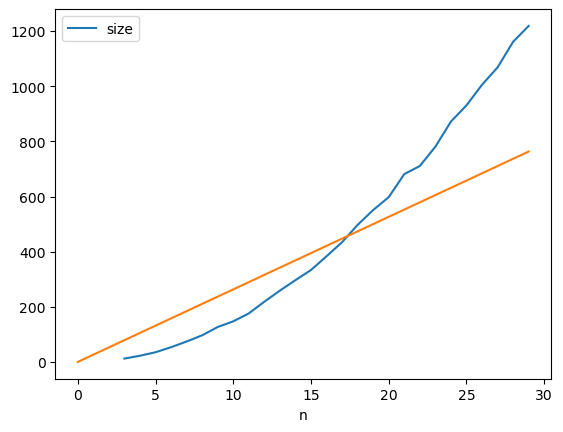

In [31]:
df.groupby('n').mean().plot()
plt.plot(np.arange(n), 100 * np.arange(n) / 3.8)

In [56]:
G = AutomataGroup.generate_H3()

In [57]:
d = ab_com = G('abab')
e = bc_com = G('bcbc')
f = ca_com = G('caca')

g = ab_com_c = G('c') * ab_com * G('c')
h = bc_com_a = G('a') * bc_com * G('a')
i = ca_com_b = G('b') * ca_com * G('b')

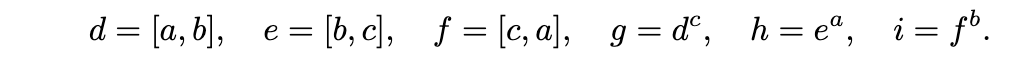
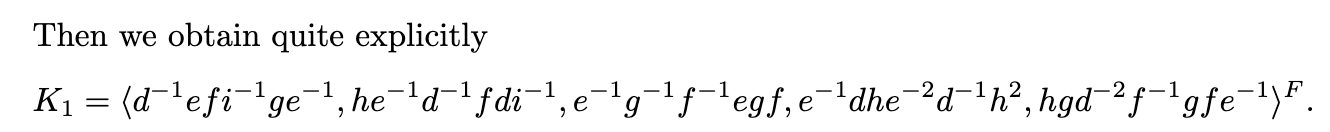

In [91]:
a, b, c = G('a'), G('b'), G('c')

In [143]:
def tau(el):
    res = ''
    trans = {'a': 'a', 'b' : 'cbc', 'c': 'bcb'}
    for letter in el.name:
        res += trans[letter]
    return G(res)

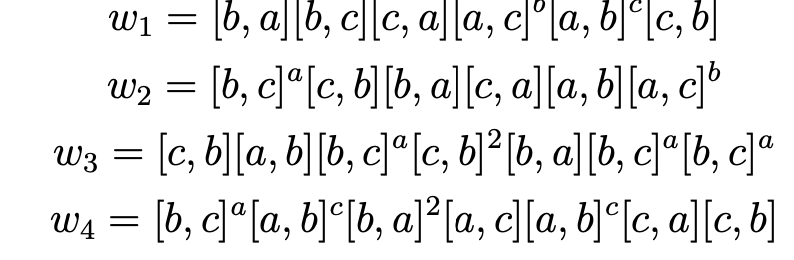

In [169]:
i

H3(bcacab = (0 2 1) (ca, cb, ba))

In [168]:
tau(i)

H3(cbcbcbabcbacbc = (2) (cbbc, cbbc, bcacab))

In [129]:
w1 = 'bababcbccacabacacbcababccbcb'
w2 = 'abcbcacbcbbabacacaababbacacb'
w3 = 'cbcbabababcbcacbcbcbcbbabaabcbcaabcbca'
w4 = 'abcbcacababcbabababaacaccababccacacbcb'

w1 = G(w1)
w2 = G(w2)
w3 = G(w3)
w4 = G(w4)

In [147]:
len(w1)

28

In [149]:
len(tau(tau(w1)))

188

In [148]:
tau(tau(w1)).tree.size()

960

In [106]:
d.inverse() * e * f * i.inverse() * g * e.inverse()

H3(bababcbccacabacacbcababccbcb = (2) (abccaababb, bacaacaccb, bbcbccbc))

In [58]:
d.inverse()

H3(baba = (0 2 1) (b, a, ba))

In [59]:
d.inverse() * e

H3(bababcbc = (2) (abc, bac, bb))

In [60]:
d.inverse() * e * f

H3(bababcbccaca = (0 1 2) (baca, bbc, abcca))

In [61]:
d.inverse() * e * f * i.inverse()

H3(bababcbccacabacacb = (0 2 1) (bbcbc, abccaab, bacaac))

In [62]:
d.inverse() * e * f * i.inverse() * g

H3(bababcbccacabacacbcababc = (0 1 2) (bacaacac, bbcbccb, abccaabab))

In [63]:
d.inverse() * e * f * i.inverse() * g * e.inverse()

H3(bababcbccacabacacbcababccbcb = (2) (abccaababb, bacaacaccb, bbcbccbc))

In [64]:
reduce_repetitions('bababcbccacabacacbcababccbcb', 'abc').replace('a', '')

'bbbcbcbccbcbcb'